In [1]:
# Dubai Property Dataset Creator
import pandas as pd
import numpy as np

# Set random seed
np.random.seed(42)

# Dubai locations with realistic characteristics
locations = {
    'Palm Jumeirah': {'category': 'Luxury', 'base_price_per_sqft': 3500},
    'Dubai Marina': {'category': 'Premium', 'base_price_per_sqft': 2800},
    'Downtown Dubai': {'category': 'Premium', 'base_price_per_sqft': 3000},
    'Business Bay': {'category': 'Premium', 'base_price_per_sqft': 2600},
    'JBR': {'category': 'Mid-Range', 'base_price_per_sqft': 2200},
    'Dubai Hills': {'category': 'Mid-Range', 'base_price_per_sqft': 2000},
    'Jumeirah Village Circle': {'category': 'Affordable', 'base_price_per_sqft': 1500},
    'International City': {'category': 'Budget', 'base_price_per_sqft': 1000},
    'Discovery Gardens': {'category': 'Budget', 'base_price_per_sqft': 1100}
}

# Generate 200 properties
data = []
for loc, specs in locations.items():
    n_loc = 25  # ~25 properties per location
    
    for _ in range(n_loc):
        bedrooms = np.random.randint(1, 6)  # 1-5 bedrooms
        
        # Size based on bedrooms
        base_size = 800 + (bedrooms - 1) * 300
        size_sqft = np.random.randint(int(base_size * 0.8), int(base_size * 1.2))
        
        # Base price
        base_price = size_sqft * specs['base_price_per_sqft']
        
        # Amenities
        amenities_score = np.random.randint(3, 11)
        has_pool = 1 if specs['category'] in ['Luxury', 'Premium'] else np.random.choice([0, 1])
        has_gym = np.random.choice([0, 1], p=[0.2, 0.8])
        has_beach_access = 1 if loc in ['Palm Jumeirah', 'Dubai Marina', 'JBR'] else 0
        near_metro = np.random.choice([0, 1])
        
        # View type
        if has_beach_access:
            view_type = np.random.choice(['Sea', 'City', 'Golf', 'Park'])
        else:
            view_type = np.random.choice(['City', 'Golf', 'Park'])
        
        # Year built
        year_built = np.random.randint(2005, 2023)
        
        # Calculate final price
        price_aed = base_price
        price_aed += amenities_score * 50000
        price_aed += has_pool * 300000
        price_aed += has_gym * 100000
        price_aed += has_beach_access * 500000
        price_aed += near_metro * 150000
        
        # Random variation
        price_aed *= np.random.uniform(0.9, 1.2)
        
        data.append({
            'location': loc,
            'category': specs['category'],
            'bedrooms': bedrooms,
            'size_sqft': size_sqft,
            'price_aed': int(price_aed),
            'amenities_score': amenities_score,
            'has_pool': has_pool,
            'has_gym': has_gym,
            'has_beach_access': has_beach_access,
            'near_metro': near_metro,
            'view_type': view_type,
            'year_built': year_built
        })

# Create DataFrame
df = pd.DataFrame(data)
print(f"Created {len(df)} Dubai properties")
print(df.head())

# Save to CSV
df.to_csv('dubai_properties.csv', index=False)
print("\nDataset saved as 'dubai_properties.csv'")

Created 225 Dubai properties
        location category  bedrooms  size_sqft  price_aed  amenities_score  \
0  Palm Jumeirah   Luxury         4       1630    7113945                5   
1  Palm Jumeirah   Luxury         5       1699    8370589               10   
2  Palm Jumeirah   Luxury         2       1071    4533233                6   
3  Palm Jumeirah   Luxury         3       1178    5356378                9   
4  Palm Jumeirah   Luxury         3       1363    5869115               10   

   has_pool  has_gym  has_beach_access  near_metro view_type  year_built  
0         1        1                 1           0      Golf        2015  
1         1        1                 1           1       Sea        2006  
2         1        0                 1           1      City        2016  
3         1        0                 1           1      Park        2020  
4         1        1                 1           0      Golf        2011  

Dataset saved as 'dubai_properties.csv'


In [2]:
df = pd.read_csv('dubai_properties.csv')
df

,location,category,bedrooms,size_sqft,price_aed,amenities_score,has_pool,has_gym,has_beach_access,near_metro,view_type,year_built
0,Palm Jumeirah,Luxury,4,1630,7113945,5,1,1,1,0,Golf,2015
1,Palm Jumeirah,Luxury,5,1699,8370589,10,1,1,1,1,Sea,2006
2,Palm Jumeirah,Luxury,2,1071,4533233,6,1,0,1,1,City,2016
3,Palm Jumeirah,Luxury,3,1178,5356378,9,1,0,1,1,Park,2020
4,Palm Jumeirah,Luxury,3,1363,5869115,10,1,1,1,0,Golf,2011
...,...,...,...,...,...,...,...,...,...,...,...,...
220,Discovery Gardens,Budget,5,2356,2683899,5,0,0,0,0,Golf,2016
221,Discovery Gardens,Budget,5,1841,3188530,10,0,0,0,1,City,2022
222,Discovery Gardens,Budget,3,1297,2147070,9,1,1,0,0,Golf,2017
223,Discovery Gardens,Budget,2,1113,1443282,6,0,0,0,0,City,2012


In [3]:
df['price_per_sqft ']= df.price_aed / df.size_sqft
df['amenities_score'] = df['amenities_score'].astype(int)
df['has_pool'] = df['has_pool'].astype(int)
df['has_beach_access'] = df['has_beach_access'].astype(int)
df

,location,category,bedrooms,size_sqft,price_aed,amenities_score,has_pool,has_gym,has_beach_access,near_metro,view_type,year_built,price_per_sqft
0,Palm Jumeirah,Luxury,4,1630,7113945,5,1,1,1,0,Golf,2015,4364.383436
1,Palm Jumeirah,Luxury,5,1699,8370589,10,1,1,1,1,Sea,2006,4926.773985
2,Palm Jumeirah,Luxury,2,1071,4533233,6,1,0,1,1,City,2016,4232.710551
3,Palm Jumeirah,Luxury,3,1178,5356378,9,1,0,1,1,Park,2020,4547.010187
4,Palm Jumeirah,Luxury,3,1363,5869115,10,1,1,1,0,Golf,2011,4306.027146
...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,Discovery Gardens,Budget,5,2356,2683899,5,0,0,0,0,Golf,2016,1139.176146
221,Discovery Gardens,Budget,5,1841,3188530,10,0,0,0,1,City,2022,1731.955459
222,Discovery Gardens,Budget,3,1297,2147070,9,1,1,0,0,Golf,2017,1655.412490
223,Discovery Gardens,Budget,2,1113,1443282,6,0,0,0,0,City,2012,1296.749326


In [4]:
df['luxury_score'] = (df['amenities_score'] / 10 + df['has_pool'] + df['has_beach_access']) / 3
df

,location,category,bedrooms,size_sqft,price_aed,amenities_score,has_pool,has_gym,has_beach_access,near_metro,view_type,year_built,price_per_sqft,luxury_score
0,Palm Jumeirah,Luxury,4,1630,7113945,5,1,1,1,0,Golf,2015,4364.383436,0.833333
1,Palm Jumeirah,Luxury,5,1699,8370589,10,1,1,1,1,Sea,2006,4926.773985,1.000000
2,Palm Jumeirah,Luxury,2,1071,4533233,6,1,0,1,1,City,2016,4232.710551,0.866667
3,Palm Jumeirah,Luxury,3,1178,5356378,9,1,0,1,1,Park,2020,4547.010187,0.966667
4,Palm Jumeirah,Luxury,3,1363,5869115,10,1,1,1,0,Golf,2011,4306.027146,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,Discovery Gardens,Budget,5,2356,2683899,5,0,0,0,0,Golf,2016,1139.176146,0.166667
221,Discovery Gardens,Budget,5,1841,3188530,10,0,0,0,1,City,2022,1731.955459,0.333333
222,Discovery Gardens,Budget,3,1297,2147070,9,1,1,0,0,Golf,2017,1655.412490,0.633333
223,Discovery Gardens,Budget,2,1113,1443282,6,0,0,0,0,City,2012,1296.749326,0.200000


In [5]:
df['luxury_score'] = (df['amenities_score'] / 10 + df['has_pool'] + df['has_beach_access']) / 3
df

,location,category,bedrooms,size_sqft,price_aed,amenities_score,has_pool,has_gym,has_beach_access,near_metro,view_type,year_built,price_per_sqft,luxury_score
0,Palm Jumeirah,Luxury,4,1630,7113945,5,1,1,1,0,Golf,2015,4364.383436,0.833333
1,Palm Jumeirah,Luxury,5,1699,8370589,10,1,1,1,1,Sea,2006,4926.773985,1.000000
2,Palm Jumeirah,Luxury,2,1071,4533233,6,1,0,1,1,City,2016,4232.710551,0.866667
3,Palm Jumeirah,Luxury,3,1178,5356378,9,1,0,1,1,Park,2020,4547.010187,0.966667
4,Palm Jumeirah,Luxury,3,1363,5869115,10,1,1,1,0,Golf,2011,4306.027146,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,Discovery Gardens,Budget,5,2356,2683899,5,0,0,0,0,Golf,2016,1139.176146,0.166667
221,Discovery Gardens,Budget,5,1841,3188530,10,0,0,0,1,City,2022,1731.955459,0.333333
222,Discovery Gardens,Budget,3,1297,2147070,9,1,1,0,0,Golf,2017,1655.412490,0.633333
223,Discovery Gardens,Budget,2,1113,1443282,6,0,0,0,0,City,2012,1296.749326,0.200000


In [6]:
df.columns = df.columns.str.strip()
df

,location,category,bedrooms,size_sqft,price_aed,amenities_score,has_pool,has_gym,has_beach_access,near_metro,view_type,year_built,price_per_sqft,luxury_score
0,Palm Jumeirah,Luxury,4,1630,7113945,5,1,1,1,0,Golf,2015,4364.383436,0.833333
1,Palm Jumeirah,Luxury,5,1699,8370589,10,1,1,1,1,Sea,2006,4926.773985,1.000000
2,Palm Jumeirah,Luxury,2,1071,4533233,6,1,0,1,1,City,2016,4232.710551,0.866667
3,Palm Jumeirah,Luxury,3,1178,5356378,9,1,0,1,1,Park,2020,4547.010187,0.966667
4,Palm Jumeirah,Luxury,3,1363,5869115,10,1,1,1,0,Golf,2011,4306.027146,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,Discovery Gardens,Budget,5,2356,2683899,5,0,0,0,0,Golf,2016,1139.176146,0.166667
221,Discovery Gardens,Budget,5,1841,3188530,10,0,0,0,1,City,2022,1731.955459,0.333333
222,Discovery Gardens,Budget,3,1297,2147070,9,1,1,0,0,Golf,2017,1655.412490,0.633333
223,Discovery Gardens,Budget,2,1113,1443282,6,0,0,0,0,City,2012,1296.749326,0.200000


In [7]:
property_images = {
    'Palm Jumeirah': 'https://images.unsplash.com/photo-1512917774080-9991f1c4c750?w=400',
    'Dubai Marina': 'https://images.unsplash.com/photo-1513584684374-8bab748fbf90?w=400',
    'Downtown Dubai': 'https://images.unsplash.com/photo-1548013146-72479768bada?w=400',
    'Business Bay': 'https://images.unsplash.com/photo-1487956382158-bb926046304a?w=400',
    'JBR': 'https://images.unsplash.com/photo-1545324418-cc1a3fa10c00?w=400',
    'Dubai Hills': 'https://images.unsplash.com/photo-1574362848149-11496d93a7c7?w=400',
    'Jumeirah Village Circle': 'https://images.unsplash.com/photo-1558036117-15e82a2c9a9a?w=400',
    'International City': 'https://images.unsplash.com/photo-1558618666-fcd25c85cd64?w=400',
    'Discovery Gardens': 'https://images.unsplash.com/photo-1568605114967-8130f3a36994?w=400'
}


In [8]:
df.shape

(225, 14)

In [9]:
#exploitary data analysis


In [10]:
# which location has the highest average price?
avg_price_by_location = df.groupby('location')['price_aed'].mean()
avg_price_by_location

location
Business Bay               4642768.76
Discovery Gardens          2221614.40
Downtown Dubai             4807566.40
Dubai Hills                3139211.16
Dubai Marina               5523636.92
International City         1979052.32
JBR                        4299003.88
Jumeirah Village Circle    2694986.48
Palm Jumeirah              6294754.36
Name: price_aed, dtype: float64

In [11]:
df.location.max(),avg_price_by_location.max()

('Palm Jumeirah', 6294754.36)

In [12]:
# Optional: Show all locations sorted by average price

print(avg_price_by_location.sort_values(ascending=False).round(0).apply(lambda x: f"AED {x:,.0f}"))

location
Palm Jumeirah              AED 6,294,754
Dubai Marina               AED 5,523,637
Downtown Dubai             AED 4,807,566
Business Bay               AED 4,642,769
JBR                        AED 4,299,004
Dubai Hills                AED 3,139,211
Jumeirah Village Circle    AED 2,694,986
Discovery Gardens          AED 2,221,614
International City         AED 1,979,052
Name: price_aed, dtype: object


In [13]:
# whats the correlation between price per sqft and price aed
corr= df['size_sqft'].corr(df['price_aed'])
corr

0.5640736161731145

In [14]:
df.columns


Index(['location', 'category', 'bedrooms', 'size_sqft', 'price_aed',
       'amenities_score', 'has_pool', 'has_gym', 'has_beach_access',
       'near_metro', 'view_type', 'year_built', 'price_per_sqft',
       'luxury_score'],
      dtype='object')

In [15]:
# how many properties have been beach acess
df['has_beach_access'].value_counts()[1]

75

In [16]:
(df['has_beach_access']==1).sum()

75

In [17]:
#whats the avg price per qft for each category
df.groupby('category')['price_per_sqft'].mean().round(2).sort_values(ascending =False)

category
Luxury        4633.25
Premium       3743.70
Mid-Range     2904.39
Affordable    2122.34
Budget        1580.95
Name: price_per_sqft, dtype: float64

In [18]:
# which view_type is most common
df.view_type.max()

'Sea'

In [19]:
df['image_url'] = df['location'].map(property_images)


In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\hplap\AppData\Local\Temp\ipykernel_12936\1578808069.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='location', y='price_aed',palette = 'pastel')


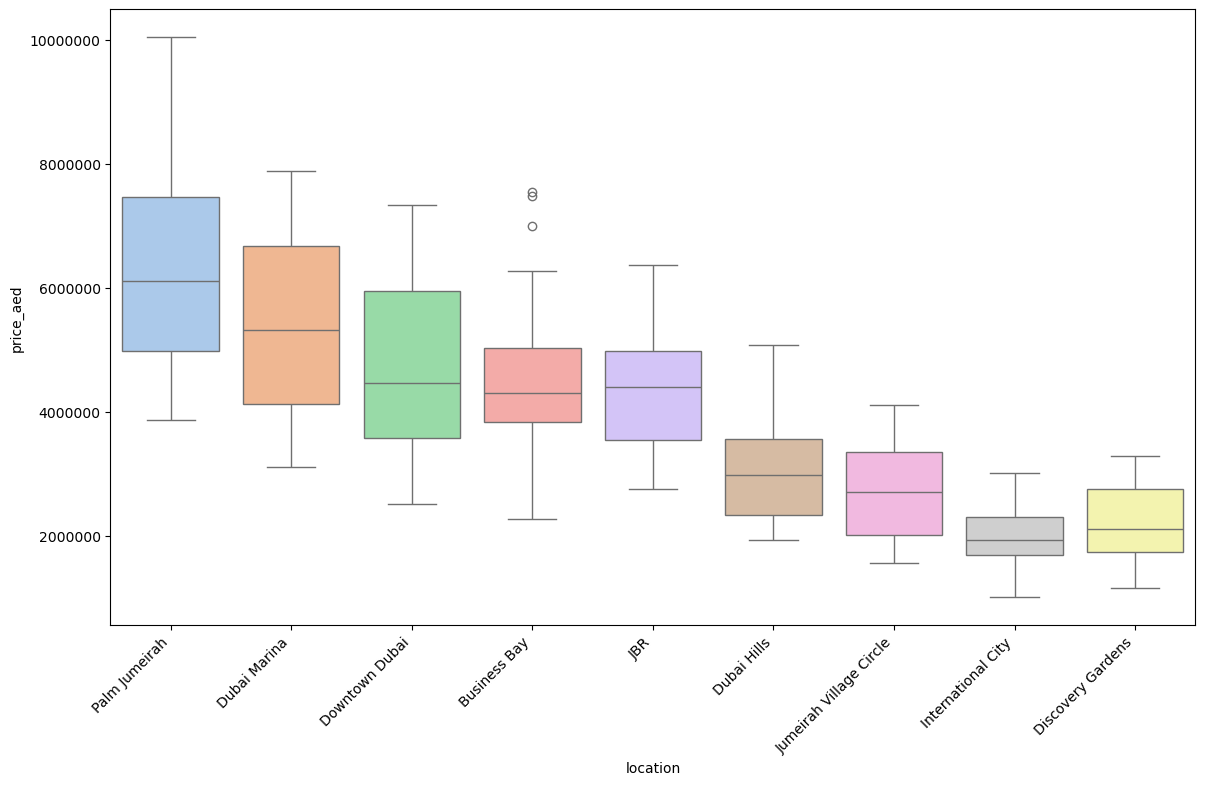

In [21]:
# Chart 1: Price distribution by location (Box plot)
plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x='location', y='price_aed',palette = 'pastel')
plt.xticks(rotation=45, ha='right')
plt.ticklabel_format(style='plain', axis='y')   # ⭐ remove 1e7
plt.show()


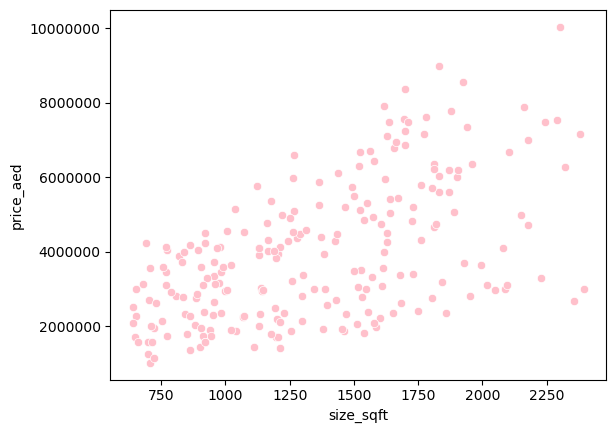

In [22]:
# Chart 2: Price vs Size correlation (Scatter plot)#
sns.scatterplot(x = 'size_sqft' ,y = 'price_aed',data = df,color = 'pink')
plt.ticklabel_format(style='plain', axis='y')   # ⭐ remove 1e7

<Axes: xlabel='category', ylabel='price_per_sqft'>

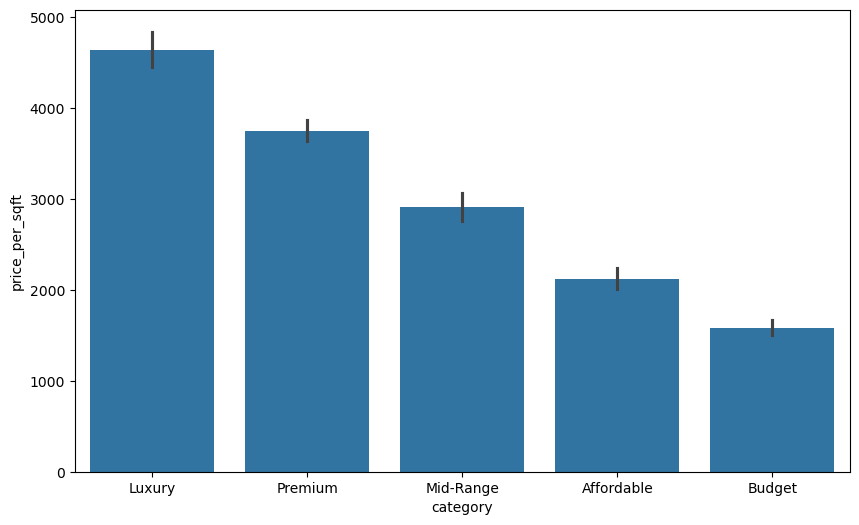

In [23]:
# Chart 3: Average price_per_sqft by category (Bar plot)
import numpy as np
plt.figure(figsize = (10,6))
sns.barplot(x = 'category',y = 'price_per_sqft',data =df,estimator=np.mean)


In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [25]:
features = ['size_sqft', 'bedrooms', 'amenities_score', 
            'has_pool', 'has_beach_access', 'near_metro', 
            'price_per_sqft', 'luxury_score']

In [26]:
x = df[features]
y = df['price_aed']

In [27]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [28]:
model= RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [29]:
prediction = model.predict(x_test)
prediction

array([6111158, 4115655, 4662052, 2757523, 2285244, 1441277, 3468795,
       2276568, 2757523, 1365371, 4109194, 4243807, 3643405, 4190082,
       5315239, 7496707, 2515639, 1443282, 5186705, 1723938, 6199593,
       3988045, 1723938, 3060363, 3835495, 3113180, 2552002, 3517120,
       4724653, 5446125, 3632317, 2610845, 7249273, 2117002, 2705082,
       4462684, 5732207, 4662052, 2851640, 3555060, 3203022, 2968176,
       3935625, 1996231, 1441277], dtype=int64)

In [30]:
from sklearn.metrics import mean_absolute_error, r2_score

# Calculate metrics
mae = mean_absolute_error(y_test, prediction)
r2 = r2_score(y_test, prediction)
r2,mae

(0.6588470978871067, 685416.0222222222)

In [31]:
# What matters most in Dubai property pricing?
feature_importance = (
    pd.DataFrame({
        'feature': features,
        'importance': model.feature_importances_
    })
    .assign(importance_pct=lambda x: (x.importance * 100).round(2))
    .sort_values('importance', ascending=False)
    .reset_index(drop=True)
    
)

feature_importance


,feature,importance,importance_pct
0,size_sqft,0.248415,24.84
1,price_per_sqft,0.248344,24.83
2,luxury_score,0.149580,14.96
3,amenities_score,0.124560,12.46
4,bedrooms,0.105238,10.52
5,near_metro,0.063370,6.34
6,has_beach_access,0.032051,3.21
7,has_pool,0.028441,2.84


In [32]:
# Sample properties to show predictions
sample_idx = 0
actual_price = y_test.iloc[sample_idx]
predicted_price = prediction[sample_idx]
error_percent = ((predicted_price - actual_price) / actual_price) * 100
actual_price,predicted_price,error_percent

(6777329, 6111158, -9.829403294424692)

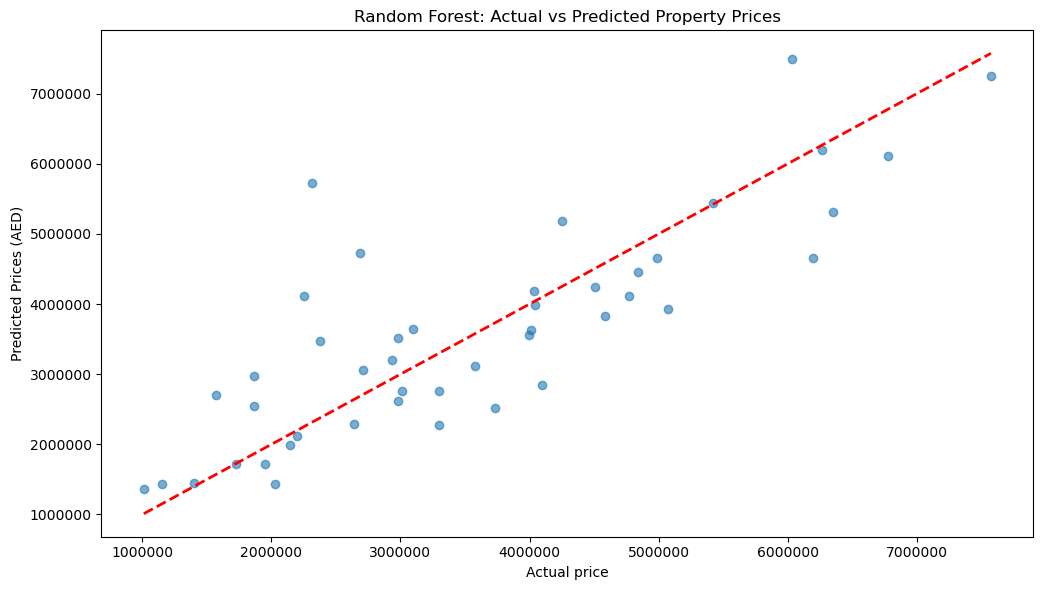

In [33]:
plt.figure(figsize = (10,6))
plt.scatter(y_test,prediction,alpha = 0.6)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'r--',lw = 2)
plt.xlabel('Actual price')
plt.ylabel('Predicted Prices (AED)')
plt.title('Random Forest: Actual vs Predicted Property Prices')
plt.tight_layout()
plt.ticklabel_format(style='plain')

plt.show()

In [34]:
# Days on market depends on:
# 1. Location premium (Palm sells faster)
# 2. Price competitiveness 
# 3. Amenities (beach/pool reduce time)
# 4. Seasonality (winter sells faster)

import numpy as np

base_days = {
    'Palm Jumeirah': 45,
    'Dubai Marina': 60, 
    'Downtown Dubai': 55,
    'Business Bay': 65,
    'JBR': 70,
    'Dubai Hills': 75,
    'Jumeirah Village Circle': 85,
    'International City': 95,
    'Discovery Gardens': 90
}

# Base days from dictionary
df['base_days'] = df['location'].map(base_days).astype(float)

# Beach access reduces by 30%
df['base_days'] *= np.where(df['has_beach_access'] == 1, 0.7, 1)

# Good price reduces by 20%
area_avg_price = df.groupby('location')['price_aed'].transform('mean')
df['base_days'] *= np.where(df['price_aed'] < area_avg_price, 0.8, 1)

# High amenities reduces by 15%
df['base_days'] *= np.where(df['amenities_score'] > 7, 0.85, 1)

# Add random ±10 days
df['days_on_market'] = df['base_days'] + np.random.randint(-10, 11, len(df))

# Clip and convert to integer
df['days_on_market'] = df['days_on_market'].clip(7, 180).round().astype(int)

# Remove helper column
df.drop('base_days', axis=1, inplace=True)
df

,location,category,bedrooms,size_sqft,price_aed,amenities_score,has_pool,has_gym,has_beach_access,near_metro,view_type,year_built,price_per_sqft,luxury_score,image_url,days_on_market
0,Palm Jumeirah,Luxury,4,1630,7113945,5,1,1,1,0,Golf,2015,4364.383436,0.833333,https://images.unsplash.com/photo-151291777408...,36
1,Palm Jumeirah,Luxury,5,1699,8370589,10,1,1,1,1,Sea,2006,4926.773985,1.000000,https://images.unsplash.com/photo-151291777408...,18
2,Palm Jumeirah,Luxury,2,1071,4533233,6,1,0,1,1,City,2016,4232.710551,0.866667,https://images.unsplash.com/photo-151291777408...,20
3,Palm Jumeirah,Luxury,3,1178,5356378,9,1,0,1,1,Park,2020,4547.010187,0.966667,https://images.unsplash.com/photo-151291777408...,31
4,Palm Jumeirah,Luxury,3,1363,5869115,10,1,1,1,0,Golf,2011,4306.027146,1.000000,https://images.unsplash.com/photo-151291777408...,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,Discovery Gardens,Budget,5,2356,2683899,5,0,0,0,0,Golf,2016,1139.176146,0.166667,https://images.unsplash.com/photo-156860511496...,99
221,Discovery Gardens,Budget,5,1841,3188530,10,0,0,0,1,City,2022,1731.955459,0.333333,https://images.unsplash.com/photo-156860511496...,70
222,Discovery Gardens,Budget,3,1297,2147070,9,1,1,0,0,Golf,2017,1655.412490,0.633333,https://images.unsplash.com/photo-156860511496...,68
223,Discovery Gardens,Budget,2,1113,1443282,6,0,0,0,0,City,2012,1296.749326,0.200000,https://images.unsplash.com/photo-156860511496...,67


In [35]:
# A/B testing

In [36]:
# does beach acess reduce days on market?
# Split into groups
from scipy.stats import ttest_ind
check = df[df['has_beach_access'] == 0]
sol   = df[df['has_beach_access'] == 1]

# Hypothesis Test:does beach acess reduce days on market?
stat, p_value = ttest_ind(sol['days_on_market'], check['days_on_market'], equal_var=False)
print("A/B TEST RESULTS: BEACH ACESS IMPACT")
print(f"Without beach access: {check['days_on_market'].mean():,.0f}")
print(f"With beach access: {sol['days_on_market'].mean():,.0f}")
print(f"Difference: {((sol['days_on_market'].mean()/check['days_on_market'].mean())-1)*100:.1f}%")
print(f"P-value: {p_value:.4f}")
print(f"Statistically Significant: {'YES' if p_value < 0.05 else 'NO'}")


A/B TEST RESULTS: BEACH ACESS IMPACT
Without beach access: 65
With beach access: 35
Difference: -45.9%
P-value: 0.0000
Statistically Significant: YES


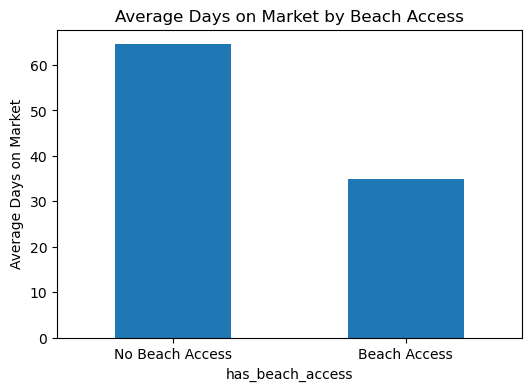

In [37]:
means = df.groupby('has_beach_access')['days_on_market'].mean()

plt.figure(figsize = (6,4))
means.plot(kind = 'bar')
plt.xticks([0,1], ['No Beach Access', 'Beach Access'], rotation=0)
plt.ylabel("Average Days on Market")
plt.title("Average Days on Market by Beach Access")
plt.show()

In [38]:
# do properties near metro sell for premium
from scipy.stats import ttest_ind

# Split groups
yes_metro = df[df['near_metro'] == 1]
no_metro  = df[df['near_metro'] == 0]

# T-test on PRICE
stat, p_value = ttest_ind(
    yes_metro['price_aed'],
    no_metro['price_aed'],
    equal_var=False
)

print("A/B TEST: METRO PREMIUM EFFECT")
print(f"Near Metro Avg Price:     {yes_metro['price_aed'].mean():,.0f} AED")
print(f"Not Near Metro Avg Price: {no_metro['price_aed'].mean():,.0f} AED")

difference = ((yes_metro['price_aed'].mean() / no_metro['price_aed'].mean()) - 1) * 100
print(f"Difference: {difference:.1f}%")

print(f"P-value: {p_value:.4f}")
print(f"Statistically Significant: {'YES' if p_value < 0.05 else 'NO'}")


A/B TEST: METRO PREMIUM EFFECT
Near Metro Avg Price:     3,868,734 AED
Not Near Metro Avg Price: 4,039,166 AED
Difference: -4.2%
P-value: 0.4865
Statistically Significant: NO


C:\Users\hplap\AppData\Local\Temp\ipykernel_12936\2106242809.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'near_metro', y = 'price_aed',data = df,estimator = 'mean',palette = 'pastel')


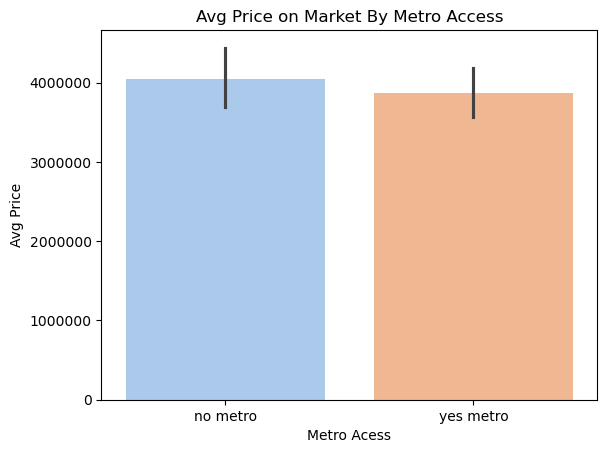

In [39]:
sns.barplot(x = 'near_metro', y = 'price_aed',data = df,estimator = 'mean',palette = 'pastel')
plt.xticks([0,1],['no metro','yes metro'])
plt.ylabel('Avg Price')
plt.xlabel('Metro Acess')
plt.title('Avg Price on Market By Metro Access')
plt.ticklabel_format(style='plain', axis='y') 
plt.show()


In [40]:
# "Does 'Palm Jumeirah' name increase value vs just location
A = df[df['location']== "Palm Jumeirah"]
B = df[df['location']!= "Palm Jumeirah"]

# T-test on PRICE
stat, p_value = ttest_ind(
    A['price_aed'],
    B['price_aed'],
    equal_var=False
)

print("A/B TEST: METRO PREMIUM EFFECT")
print(f"Yes:{A['price_aed'].mean():,.0f} AED")
print(f"No {B['price_aed'].mean():,.0f} AED")

difference = ((A['price_aed'].mean() / B['price_aed'].mean()) - 1) * 100
print(f"Difference: {difference:.1f}%")

print(f"P-value: {p_value:.4f}")
print(f"Statistically Significant: {'YES' if p_value < 0.05 else 'NO'}")

A/B TEST: METRO PREMIUM EFFECT
Yes:6,294,754 AED
No 3,663,480 AED
Difference: 71.8%
P-value: 0.0000
Statistically Significant: YES


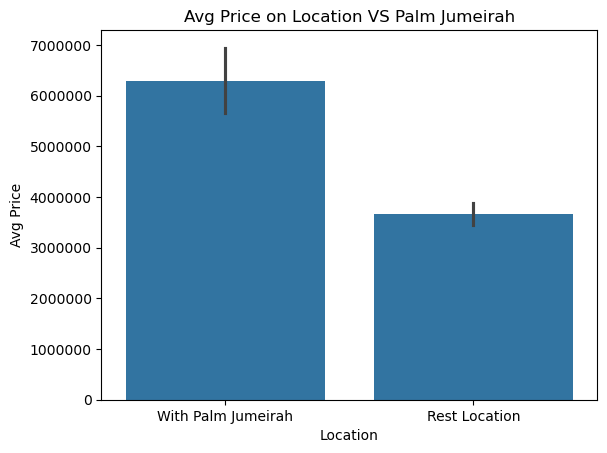

In [41]:
df['location_group'] = df['location'].apply(lambda x: 'Palm Jumeirah' if x == 'Palm Jumeirah' else 'Rest Location')

sns.barplot(x = 'location_group',y = 'price_aed',data =df,estimator = 'mean')
plt.xticks([0,1],['With Palm Jumeirah','Rest Location'])
plt.ylabel('Avg Price')
plt.xlabel('Location')
plt.title('Avg Price on Location VS Palm Jumeirah')
plt.ticklabel_format(style='plain', axis='y') 
plt.show()


In [42]:
df.to_csv('properties_full.csv', index=False)


In [43]:
reg = RandomForestClassifier()

In [44]:
reg.fit(df[['price_per_sqft']],df.price_aed)

RandomForestClassifier()

In [45]:
import numpy as np

# Single sample with the same number of features as X
X_new = np.array([[4364.383436]])  # shape = (1, number_of_features)

y_pred = reg.predict(X_new)
print(y_pred)


[7113945]


C:\Users\hplap\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [46]:
y= np.array([[4926.773985]])
reg.predict(y)


C:\Users\hplap\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([8370589], dtype=int64)

In [47]:
r = np.array([[56984.6700]])


In [48]:
reg.predict(r)

C:\Users\hplap\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([4240033], dtype=int64)

In [49]:
import pandas as pd
df = pd.read_csv("dubai_properties.csv")
df['property_id'] = range(1, len(df)+1)
df.to_csv("properties_with_id.csv", index=False)


In [50]:
import pandas as pd

df = pd.read_csv("dubai_properties.csv")

# Create a new incremental ID column starting from 1
df["property_id"] = range(1, len(df) + 1)

# Save it back (overwrite or create new)
df.to_csv("dubai_properties.csv", index=False)


In [51]:
df

,location,category,bedrooms,size_sqft,price_aed,amenities_score,has_pool,has_gym,has_beach_access,near_metro,view_type,year_built,property_id
0,Palm Jumeirah,Luxury,4,1630,7113945,5,1,1,1,0,Golf,2015,1
1,Palm Jumeirah,Luxury,5,1699,8370589,10,1,1,1,1,Sea,2006,2
2,Palm Jumeirah,Luxury,2,1071,4533233,6,1,0,1,1,City,2016,3
3,Palm Jumeirah,Luxury,3,1178,5356378,9,1,0,1,1,Park,2020,4
4,Palm Jumeirah,Luxury,3,1363,5869115,10,1,1,1,0,Golf,2011,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,Discovery Gardens,Budget,5,2356,2683899,5,0,0,0,0,Golf,2016,221
221,Discovery Gardens,Budget,5,1841,3188530,10,0,0,0,1,City,2022,222
222,Discovery Gardens,Budget,3,1297,2147070,9,1,1,0,0,Golf,2017,223
223,Discovery Gardens,Budget,2,1113,1443282,6,0,0,0,0,City,2012,224
